<a href="https://colab.research.google.com/github/fridaruh/resources_sec_genome/blob/master/nube_palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
file_content=open ("/content/Consolidado_entrevistas.txt").read()

In [3]:
file_content

'Muy bien. Bueno pues, empecemos platicando un poco sobre ti, cómo te llamas, ¿a qué te dedicas cuál es tu trayectoria? Bueno, yo soy telma peón, soy académica de la Universidad de Nagua, que en este momento soy coordinadora de las materias de liderazgo y desarrollo personal y cordí liderazgo y equipos de alto desempeño. Tengo una licenciatura de relaciones industriales, una mestri en filosofía, una mestri en biotética y un doctorado en filosofía. Desde hace 12 años o que será frida, no sé, 15 años, estoy desarrollando estudios e investigación sobre transhumanismo y sobre avances biomedicos y de chib biomedicos para la aplicación del transhumanismo. ¿Qué más tengo tres grupos de investigación? O cuatro, yo ni me acuerdo. Uno es sobre transhumanismo y medio transhumanistas, otro es sobre neurociencias y liderazgo y otro es sobre feminismo. Mira, son tres, no son cu. Ah, no, hay una inteligencia artificial que no ha jalado. Sí, ya sé que es tu tema, pero no ha jalado. Tengo un doctor que

In [5]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A., U.K.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno (10-20),  e-mail
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 --> 15, 5 o 100% --> 100
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación 
'''

In [11]:

token_1 = file_content.lower() #convierte a minúsculas

In [12]:
token_1

'muy bien. bueno pues, empecemos platicando un poco sobre ti, cómo te llamas, ¿a qué te dedicas cuál es tu trayectoria? bueno, yo soy telma peón, soy académica de la universidad de nagua, que en este momento soy coordinadora de las materias de liderazgo y desarrollo personal y cordí liderazgo y equipos de alto desempeño. tengo una licenciatura de relaciones industriales, una mestri en filosofía, una mestri en biotética y un doctorado en filosofía. desde hace 12 años o que será frida, no sé, 15 años, estoy desarrollando estudios e investigación sobre transhumanismo y sobre avances biomedicos y de chib biomedicos para la aplicación del transhumanismo. ¿qué más tengo tres grupos de investigación? o cuatro, yo ni me acuerdo. uno es sobre transhumanismo y medio transhumanistas, otro es sobre neurociencias y liderazgo y otro es sobre feminismo. mira, son tres, no son cu. ah, no, hay una inteligencia artificial que no ha jalado. sí, ya sé que es tu tema, pero no ha jalado. tengo un doctor que

In [24]:
flatten = nltk.regexp_tokenize(token_1, pattern)

In [25]:
flatten

['muy',
 'bien',
 '.',
 'bueno',
 'pues',
 ',',
 'empecemos',
 'platicando',
 'un',
 'poco',
 'sobre',
 'ti',
 ',',
 'cómo',
 'te',
 'llamas',
 ',',
 'a',
 'qué',
 'te',
 'dedicas',
 'cuál',
 'es',
 'tu',
 'trayectoria',
 '?',
 'bueno',
 ',',
 'yo',
 'soy',
 'telma',
 'peón',
 ',',
 'soy',
 'académica',
 'de',
 'la',
 'universidad',
 'de',
 'nagua',
 ',',
 'que',
 'en',
 'este',
 'momento',
 'soy',
 'coordinadora',
 'de',
 'las',
 'materias',
 'de',
 'liderazgo',
 'y',
 'desarrollo',
 'personal',
 'y',
 'cordí',
 'liderazgo',
 'y',
 'equipos',
 'de',
 'alto',
 'desempeño',
 '.',
 'tengo',
 'una',
 'licenciatura',
 'de',
 'relaciones',
 'industriales',
 ',',
 'una',
 'mestri',
 'en',
 'filosofía',
 ',',
 'una',
 'mestri',
 'en',
 'biotética',
 'y',
 'un',
 'doctorado',
 'en',
 'filosofía',
 '.',
 'desde',
 'hace',
 '12',
 'años',
 'o',
 'que',
 'será',
 'frida',
 ',',
 'no',
 'sé',
 ',',
 '15',
 'años',
 ',',
 'estoy',
 'desarrollando',
 'estudios',
 'e',
 'investigación',
 'sobre',
 't

In [17]:
import string

In [18]:
puntuacion = list(string.punctuation) #convierto signos de puntuación a una lista

In [19]:
puntuacion.append('...')

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
newStopWords = nltk.corpus.stopwords.words('spanish')

In [26]:
df = [w for w in flatten if w not in newStopWords ]

In [27]:
df_2 = [w for w in df if w not in puntuacion]

In [28]:
freqwords = nltk.FreqDist(df_2)

In [29]:

freqwords.most_common(15)

[('entonces', 201),
 ('si', 185),
 ('creo', 161),
 ('pues', 120),
 ('sé', 97),
 ('ejemplo', 95),
 ('hacer', 91),
 ('bueno', 86),
 ('ser', 85),
 ('así', 75),
 ('parece', 74),
 ('va', 72),
 ('cosas', 71),
 ('datos', 69),
 ('años', 67)]

Quito palabras irrelevantes

In [62]:
irrelevantes = ['entonces','si','creo','pues','sé','ejemplo','hacer',
                'bueno','ser','así','parece','va','cosas','ahí','cómo',
                'tipo','bien','ver','tema','digo','sabes','hace','tal',
                'puede','tener','vez','haciendo','decir','puedes','haciendo',
                'podría','ok','demás','digamos','pueda','poder','dentro','final',
                'van','cuestión','hablando','cada','alguna','súper','oye','sino',
                'haber','verdad','cual','cualquier','vamos','quién','pueden']

In [63]:
df_3 = [w for w in df_2 if w not in irrelevantes]

In [64]:
freqwords = nltk.FreqDist(df_3)

In [65]:
freqwords.most_common(50)

[('datos', 69),
 ('años', 67),
 ('parte', 53),
 ('investigación', 51),
 ('personas', 50),
 ('gente', 49),
 ('futuro', 47),
 ('crees', 46),
 ('enfermedades', 40),
 ('ahorita', 39),
 ('genoma', 39),
 ('méxico', 38),
 ('aquí', 33),
 ('menos', 32),
 ('igual', 32),
 ('10', 32),
 ('probable', 31),
 ('ahora', 30),
 ('mejor', 30),
 ('genética', 28),
 ('información', 27),
 ('salud', 26),
 ('tiempo', 26),
 ('entender', 25),
 ('claro', 24),
 ('hecho', 24),
 ('tecnología', 24),
 ('muchas', 24),
 ('medicina', 23),
 ('ciencia', 23),
 ('todavía', 22),
 ('momento', 21),
 ('siempre', 21),
 ('cuál', 19),
 ('dos', 19),
 ('persona', 19),
 ('población', 19),
 ('interés', 19),
 ('interesante', 18),
 ('temas', 18),
 ('área', 18),
 ('dar', 18),
 ('mundo', 18),
 ('da', 18),
 ('hacen', 18),
 ('ves', 18),
 ('tan', 18),
 ('poblaciones', 18),
 ('cuentas', 18),
 ('mal', 17)]

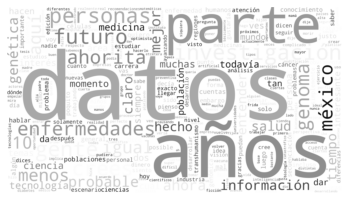

In [73]:
wordcloud = WordCloud(background_color= 'white',
                      collocations=False,
                      max_words=300,
                      width = 3600,
                      height = 2000,
                      colormap='Greys').fit_words(freqwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
wordcloud.to_file('wordcloud.png')